# Communicating Data Finding for Loan Data From Prosper dataset 

## Introduction
The dataset is available in https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest ate),
current loan status, borrower income, and many others.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Define static variables
default_color = sb.color_palette()[0]

## Data Wrangling
**Sample records of the dataset**

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# check null fields count
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### What is the dataset structure?
The dataset has 113,937 records with 81 column. you can find the details of each column given in the dataset in the link 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

**Note:** the data field ListingCategory was enhanced to contain the description value for the numeric value in ListingCategory (numeric)

### What are the main interesting features in the dataset?
I am interested in investigate the parameters 
> - Term: The length of the loan expressed in months.
> - LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
> - EstimatedEffectiveYield: Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
> - EstimatedLoss: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
> - EstimatedReturn: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
> - ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
> - IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
> - LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

## Univariate Exploration

In [6]:
# Change ListingCreationDate, LoanOriginationDate and ClosedDate to datetime format
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

In [7]:
# the count of all possible value for CreditGrade
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [8]:
# number of records with null value in CreditGrade
df.CreditGrade.isna().sum()

84984

**Let's study the Term parameter which representing The length of the loan expressed in months.**

In [9]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [10]:
# check the number of records with null values for Term parameter 
df.Term.isna().sum()

0

In [11]:
# The length of the loan expressed in months.
df.Term.describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

> - The Term parameter have 3 possible values (12, 36 , 60) Months
> - the 3 Quantile values are equal 36 Month

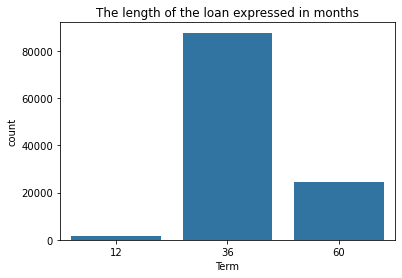

In [12]:
sb.countplot(data = df, x = 'Term', color = default_color).set_title('The length of the loan expressed in months');

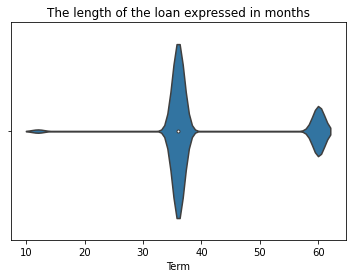

In [13]:
sb.violinplot(data = df, x = 'Term').set_title('The length of the loan expressed in months');

> From the count plot and the violin plot you can find that most of the loans length is 36 Months 

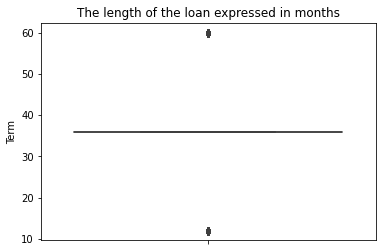

In [14]:
sb.boxplot(data = df, y = 'Term').set_title('The length of the loan expressed in months');

> - the box plot of the Term parameter complies with the values given by the description 
> - The 3 quantiles are equivalent (36 Month)

**Let's check the value of the parameter LoanStatus.**
> LoanStatus: is the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

In [15]:
# check the null values in the column LoanStatus
df.LoanStatus.isna().sum()

0

In [16]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

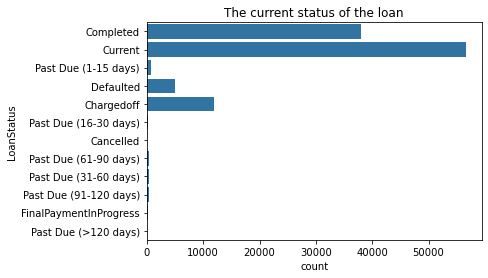

In [17]:
sb.countplot(data = df, y = 'LoanStatus', color = default_color).set_title('The current status of the loan');

> - From this plot you can see that most of the loans are in current state.

**Let's look into the value IsBorrowerHomeowner**
> - IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

In [18]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [19]:
df.IsBorrowerHomeowner.isna().sum()

0

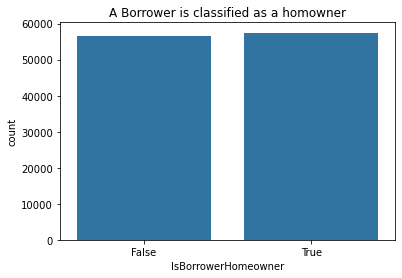

In [20]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = default_color).set_title('A Borrower is classified as a homowner');

> - from the count plot for the value IsBorrowerHomeowner, you can see that the borrowers which are classified as a home owners are a little more than the borrowes classified as no home owners

**Let's look into the value of the parameter ListingCategory**
> - ListingCategory: The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [21]:
df['ListingCategory'] = df['ListingCategory (numeric)'].map({0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'})

In [22]:
df['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

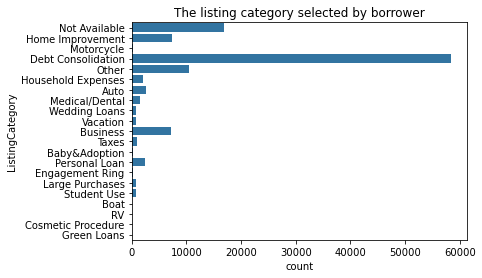

In [23]:
sb.countplot(data = df, y = 'ListingCategory', color = default_color).set_title('The listing category selected by borrower');

> - from the count plot for the ListingCategory values you can find that most of browers selected Debt Consolidation option 

**Let's check the column LenderYield values.**
> - LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

In [24]:
df.LenderYield.describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

In [25]:
df.LenderYield.isna().sum()

0

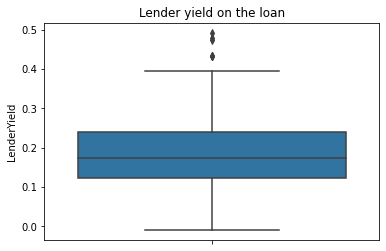

In [26]:
sb.boxplot(data = df, y = 'LenderYield').set_title('Lender yield on the loan');

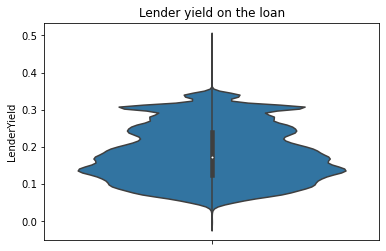

In [27]:
sb.violinplot(data = df, y = 'LenderYield').set_title('Lender yield on the loan');

> - from the plot you can see that the LenderYield is distributed evenly, many loans have linder yield 0.182701

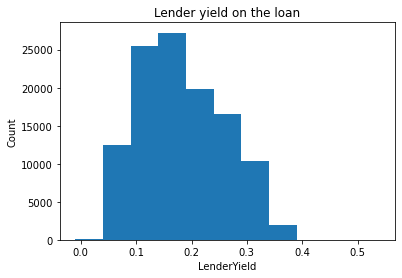

In [28]:
binsize = 0.05
bins = np.arange(-.01, df['LenderYield'].max()+binsize, binsize)
plt.hist(data = df, x = 'LenderYield', bins = bins);
plt.xlabel('LenderYield');
plt.ylabel('Count');
plt.title('Lender yield on the loan');

> - most of loans have lender Yield between 0.15 to 0.2

**Let's check the value of EstimatedEffectiveYield**
> Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.

In [29]:
# remove records before Jul 2009 
df_after200907 = df[df.LoanOriginationDate >= '2009-08-01 00:00:00']
print(df_after200907.shape)
print(df.shape)

(84964, 82)
(113937, 82)


In [30]:
df_after200907.EstimatedEffectiveYield.describe()

count    84837.000000
mean         0.168677
std          0.068462
min         -0.182700
25%          0.115670
50%          0.161500
75%          0.224300
max          0.319900
Name: EstimatedEffectiveYield, dtype: float64

In [31]:
df_after200907.EstimatedEffectiveYield.isna().sum()

127

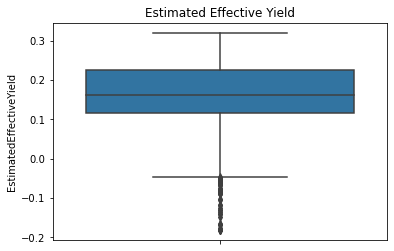

In [32]:
sb.boxplot(data = df_after200907, y = 'EstimatedEffectiveYield').set_title('Estimated Effective Yield');

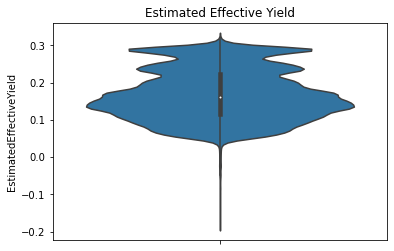

In [33]:
sb.violinplot(data = df_after200907, y = 'EstimatedEffectiveYield').set_title('Estimated Effective Yield');

> - from the plot you can see that the value of EstimatedEffectiveYield is evenly distributed

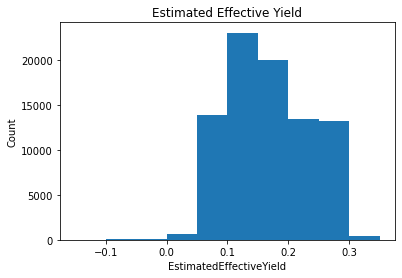

In [34]:
binsize = 0.05
bins = np.arange(-0.15, df['EstimatedEffectiveYield'].max()+binsize, binsize)
plt.hist(data = df_after200907, x = 'EstimatedEffectiveYield', bins = bins);
plt.xlabel('EstimatedEffectiveYield');
plt.ylabel('Count');
plt.title('Estimated Effective Yield');

> - from the plot you can see that most of loans have Estimated Effective Yield between .1 and .15

**Let's check the EstimatedLoss value**
> Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

In [35]:
df_after200907.EstimatedLoss.describe()

count    84837.000000
mean         0.080307
std          0.046755
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

In [152]:
df_after200907.EstimatedLoss.isna().sum()

127

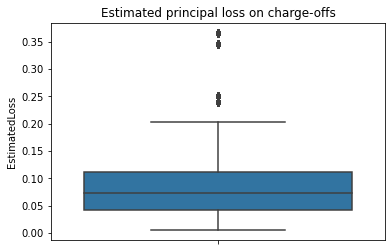

In [36]:
sb.boxplot(data = df_after200907, y = 'EstimatedLoss').set_title('Estimated principal loss on charge-offs');

> - The estimated loss mean around 0.08

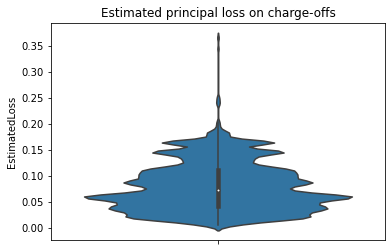

In [37]:
sb.violinplot(data = df_after200907, y = 'EstimatedLoss').set_title('Estimated principal loss on charge-offs');

> - From this plot you can find that the EstimatedLoss is evenly distributed 

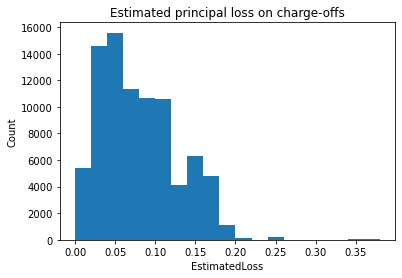

In [38]:
binsize = 0.02
bins = np.arange(0, df_after200907['EstimatedLoss'].max()+binsize, binsize)
plt.hist(data = df_after200907, x = 'EstimatedLoss', bins = bins);
plt.xlabel('EstimatedLoss');
plt.ylabel('Count');
plt.title('Estimated principal loss on charge-offs');

> - from this plot you can find that most of loans have estimated principal loss between 0.05 and 0.1

**Let's investigate the value of EstimatedReturn**
> The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

In [39]:
df_after200907.EstimatedReturn.describe()

count    84837.000000
mean         0.096070
std          0.030399
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

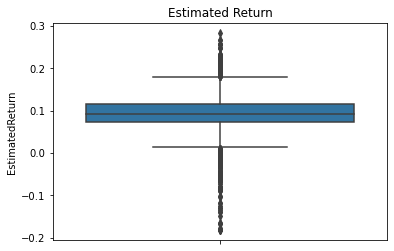

In [40]:
sb.boxplot(data = df_after200907, y = 'EstimatedReturn').set_title('Estimated Return');

> - The mean of the EstimatedReturn is 0.096068

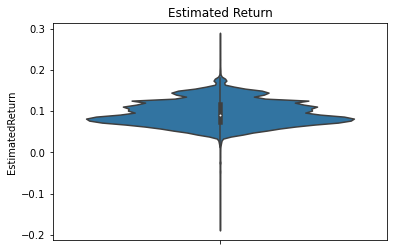

In [41]:
sb.violinplot(data = df_after200907, y = 'EstimatedReturn').set_title('Estimated Return');

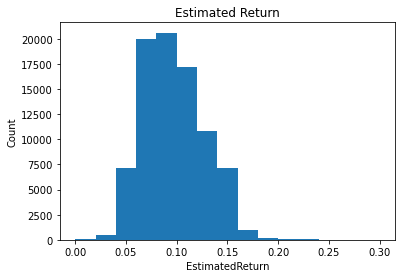

In [42]:
binsize = 0.02
bins = np.arange(0, df_after200907['EstimatedReturn'].max()+binsize, binsize)
plt.hist(data = df_after200907, x = 'EstimatedReturn', bins = bins);
plt.xlabel('EstimatedReturn');
plt.ylabel('Count');
plt.title('Estimated Return');

> - most of the loans have estimated return beteen .08 and .1

## Bivariate Exploration

In [43]:
# define the list with the numeric column names and categorical column names 
allNumericVars = ['Term', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']

<AxesSubplot:>

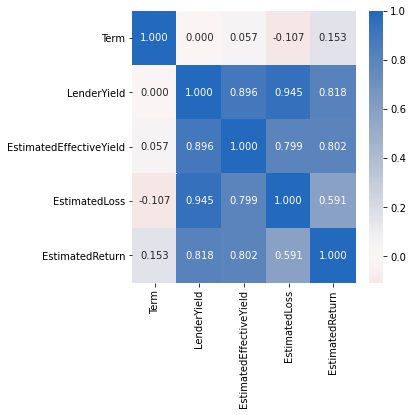

In [45]:
# correlation plot
plt.figure(figsize = [5, 5]);
sb.heatmap(df_after200907[allNumericVars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0, xticklabels=True, yticklabels=True)

> the correlation cofficients indicate there might be correlations between the following pairs of variables:
> - LenderYield and EstimatedEffectiveYield and EstimatedLoss and EstimatedReturn

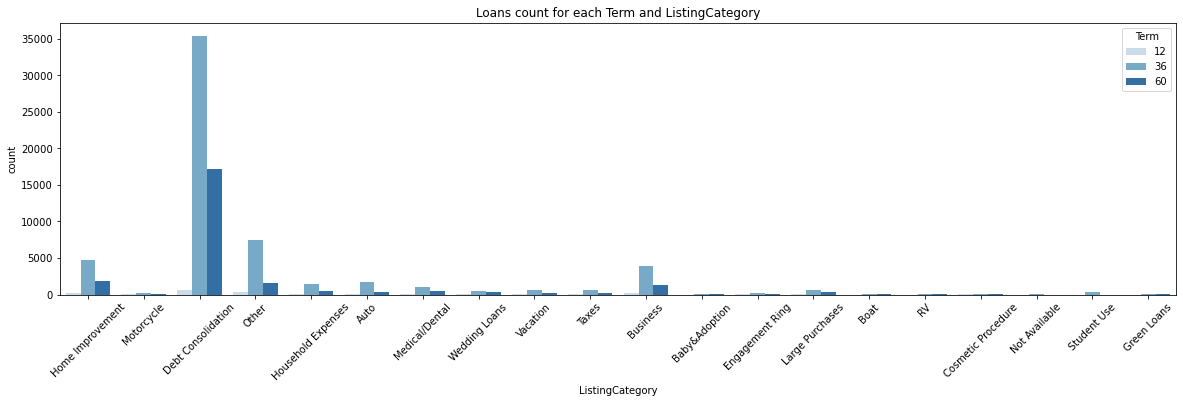

In [46]:
plt.figure(figsize = [20, 5]);
plt.title('Loans count for each Term and ListingCategory');
sb.countplot(data = df_after200907, x = 'ListingCategory', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=45);

> - The above plot show that the 36 month term is the highest for all ListingCategory
> - the ListingCategory 'Debit Consolidation' is the most popular with Term 36 Month.

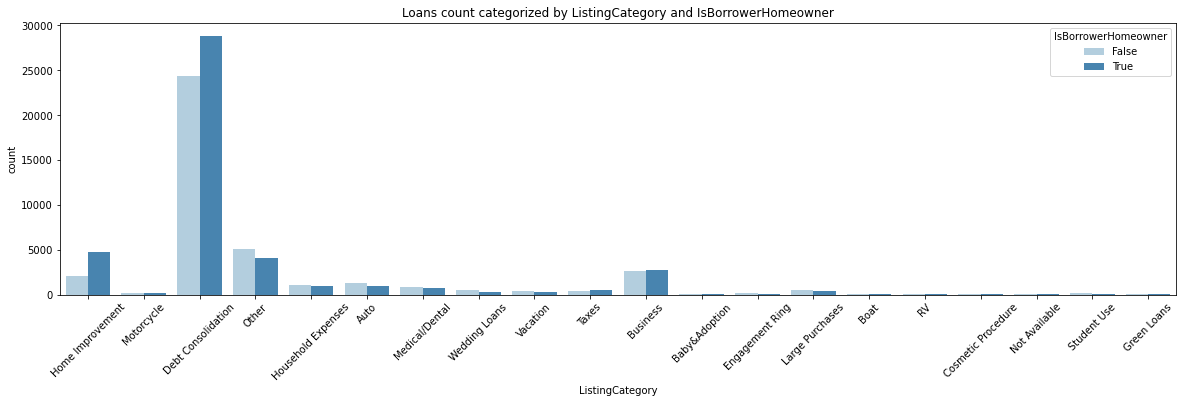

In [47]:
plt.figure(figsize = [20, 5]);
plt.title('Loans count categorized by ListingCategory and IsBorrowerHomeowner');
sb.countplot(data = df_after200907, x = 'ListingCategory', hue = 'IsBorrowerHomeowner', palette = 'Blues');
plt.xticks(rotation=45);

> - This plot showing that most of the Debit Consolidation ListingCategory are home owners

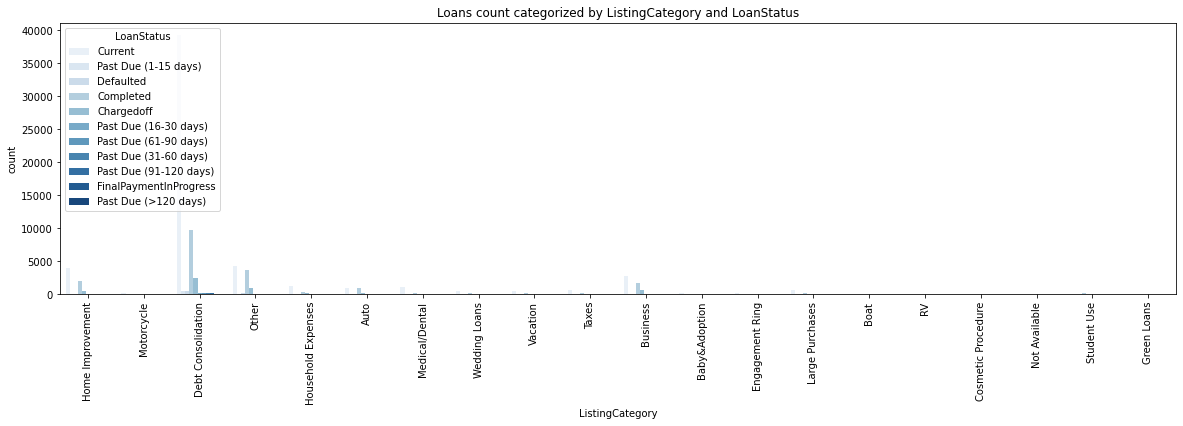

In [48]:
plt.figure(figsize = [20, 5]);
plt.title('Loans count categorized by ListingCategory and LoanStatus');
sb.countplot(data = df_after200907, x = 'ListingCategory', hue = 'LoanStatus', palette = 'Blues');
plt.xticks(rotation=90);

> - The plot showing that most of Debt Consolidation loan status is Current

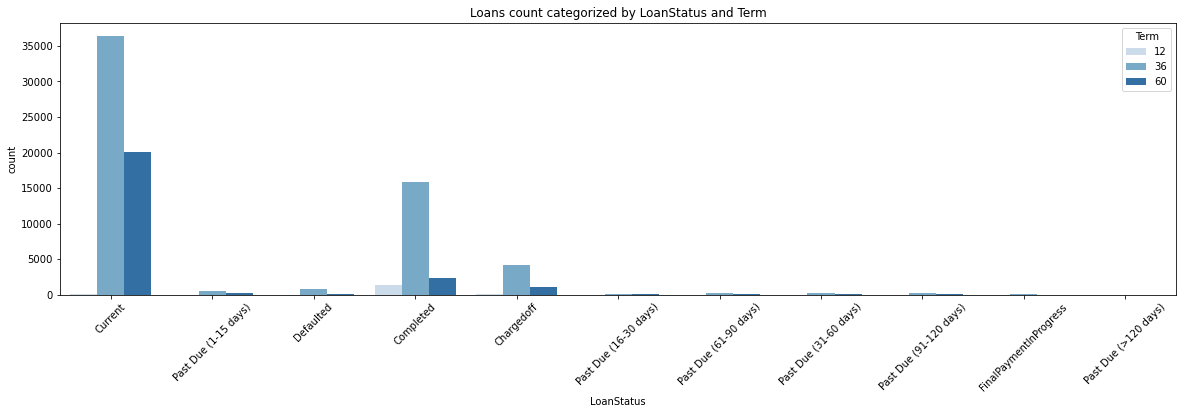

In [49]:
plt.figure(figsize = [20, 5]);
plt.title('Loans count categorized by LoanStatus and Term');
sb.countplot(data = df_after200907, x = 'LoanStatus', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=45);

> From the above plot you can find that :
> - most of the loans in Current status are 36 months and 60 months
> - 12 months loans are almost in complete state. 

## Multivariate Exploration

In [67]:
def myHist2D(x, y, **args):
    bins_x = np.arange(-0.5, df_after200907['LenderYield'].max()+0.1, 0.1);
    bins_y = np.arange(-0.5, 1, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = args.pop('color'), cmin = 0.5);
    plt.xticks(bins_x);
    plt.xticks(rotation=90);
    plt.yticks(bins_y);

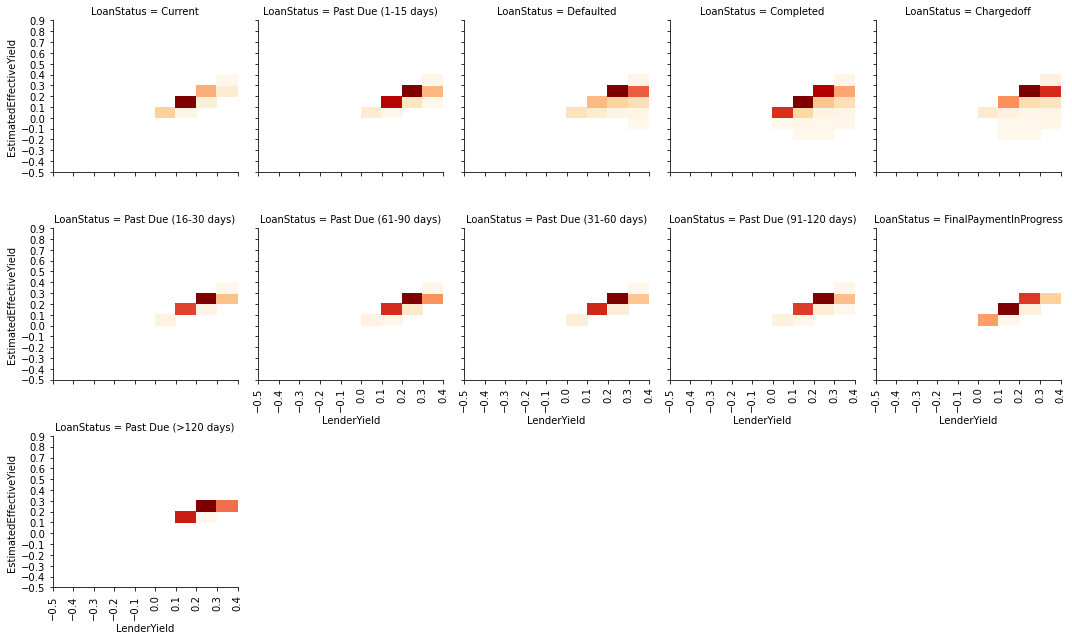

In [68]:
g = sb.FacetGrid(data = df_after200907, col = 'LoanStatus', col_wrap = 5, height = 3);
g.map(myHist2D, 'LenderYield', 'EstimatedEffectiveYield', color = 'OrRd');
g.set_xlabels('LenderYield');
g.set_ylabels('EstimatedEffectiveYield');

> From the above plots we can find that.
> - Loans with status ChargedOff/Completed having a higher Estimated Effective Yield

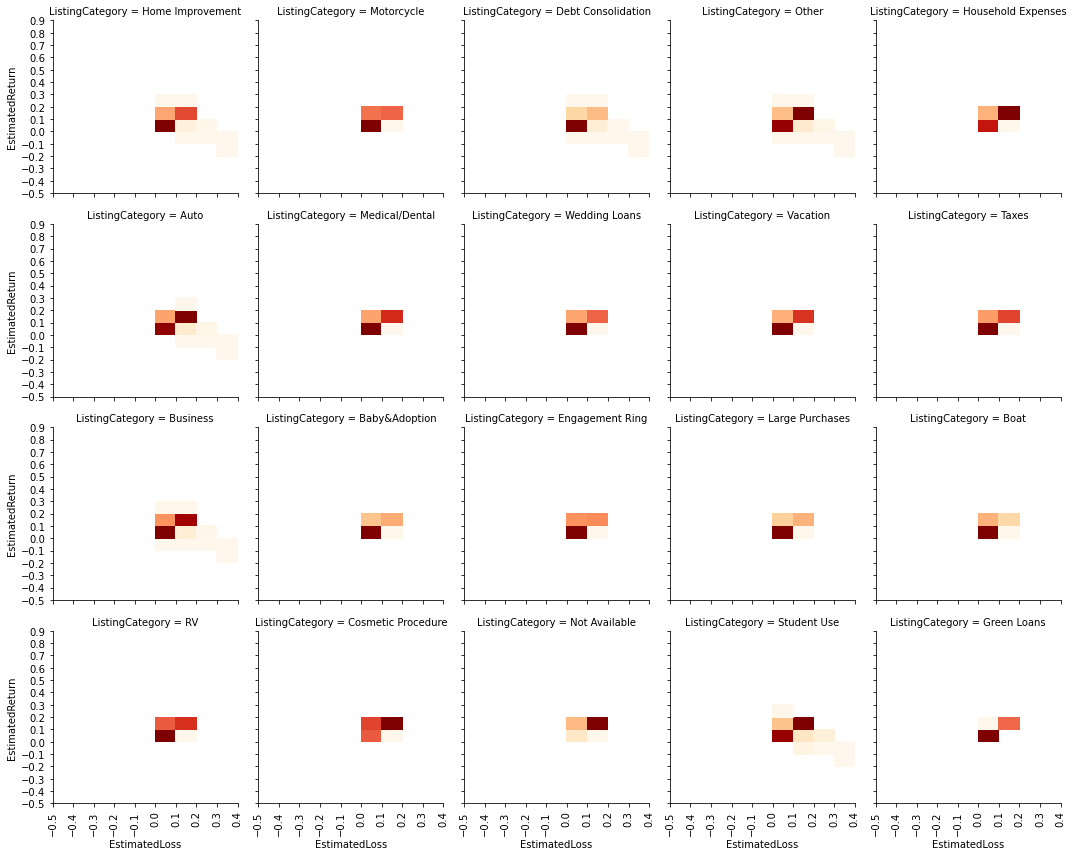

In [69]:
g = sb.FacetGrid(data = df_after200907, col = 'ListingCategory', col_wrap = 5, height = 3)
g.map(myHist2D, 'EstimatedLoss', 'EstimatedReturn', color = 'OrRd');
g.set_xlabels('EstimatedLoss');
g.set_ylabels('EstimatedReturn');

> from the above plot you can find that 
> - Loans with Listing Category Home Improvement , Debit Consolidation, Other, Auto, Business, students Use have higher estimated return and estimated loss 